# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_mouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df['Mouse ID'] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
median = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
variance = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
std = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
error = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

#found this concat method whil doing research onlineonline
summary_df = pd.concat([mean, median, variance, std, error], axis=1)
summary_df.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Standard Error']

summary_df.head()




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_agg_df.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Standard Error']
summary_agg_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [88]:
#find x axis length, which should be the number of unique drug regimen
#find the number of rows each 

x_axis_length = clean_df["Drug Regimen"].nunique()

#counts the number of timepoint rows for each regimen
y_axis_values = clean_df.groupby('Drug Regimen')['Timepoint'].count()
y_axis_values

#getting the values to be used in the pyplot section
drug_regimens = y_axis_values.index
timepoint_counts = y_axis_values.values



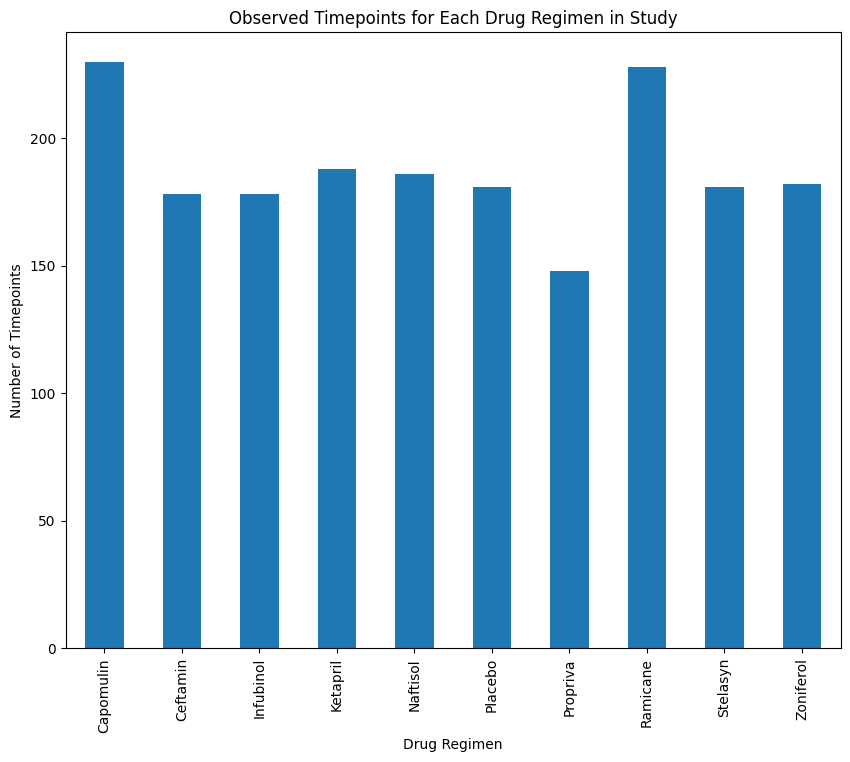

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
y_axis_values.plot(kind='bar',figsize=(10,8))

plt.title("Observed Timepoints for Each Drug Regimen in Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

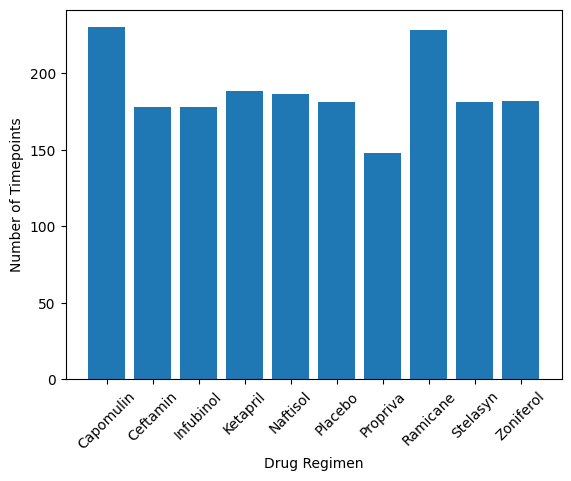

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimens, timepoint_counts)
plt.title("Observed Timepoints for Each Drug Regimen in Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=45)
plt.show()

125
123
248


<Axes: ylabel='Distribution of Mouse Sexes in Study'>

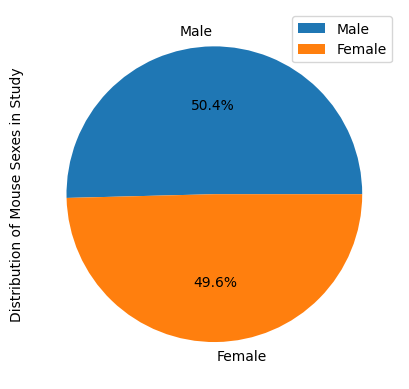

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
males_panda = mouse_metadata.loc[mouse_metadata['Sex']=="Male"]
m_count_panda = len(males_panda['Sex'])

#subtract one female to account for the duplicate female
females_panda = mouse_metadata.loc[mouse_metadata['Sex']=="Female"]
f_count_panda = len(females_panda['Sex']) - 1

mf_distribution_df = pd.DataFrame({'Distribution of Mouse Sexes in Study':[m_count_panda, f_count_panda]}, index=['Male','Female'])
mf_distribution_df.plot(kind='pie',y='Distribution of Mouse Sexes in Study', autopct='%1.1f%%')


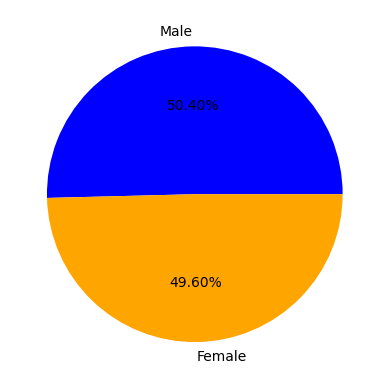

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
males = mouse_metadata.loc[mouse_metadata['Sex']=="Male"]
m_count = len(males['Sex'])

females = mouse_metadata.loc[mouse_metadata['Sex']=="Female"]
f_count = len(females['Sex']) - 1


# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [m_count, f_count]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, autopct="%0.2f%%", startangle=0, colors=colors)
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
drug_group_df = clean_df.loc[(clean_df['Drug Regimen'] == "Capomulin") | 
                                    (clean_df['Drug Regimen'] == "Ramicane") | 
                                    (clean_df['Drug Regimen'] == "Infubinol") | 
                                    (clean_df['Drug Regimen'] == "Ceftamin")]

max_timepoints = drug_group_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume
merged_max = pd.merge(clean_df, max_timepoints, how='right',on='Mouse ID')

#creates a dataframe where only the maximum timepoints remain
max_timepoints_extra = merged_max.loc[merged_max['Timepoint_x'] == merged_max['Timepoint_y']]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,a203,Infubinol,Female,20,23,45,67.973419,2,45
19,a251,Infubinol,Female,21,25,45,65.525743,1,45
29,a275,Ceftamin,Female,20,28,45,62.999356,3,45
39,a411,Ramicane,Male,3,22,45,38.407618,1,45
49,a444,Ramicane,Female,10,25,45,43.047543,0,45
...,...,...,...,...,...,...,...,...,...
773,y769,Ceftamin,Female,6,27,45,68.594745,4,45
783,y793,Capomulin,Male,17,17,45,31.896238,2,45
793,y865,Ceftamin,Male,23,26,45,64.729837,3,45
803,z578,Ramicane,Male,11,16,45,30.638696,0,45


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []
    
    # Iterates through the treaments and adds the final volume to the tumor_vol list
for treatment in treatments:
    if treatment == "Capomulin":
        drug_data = max_timepoints_extra[max_timepoints_extra["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
        tumor_vol.append(drug_data.values)
    elif  treatment == "Ramicane":
        drug_data = max_timepoints_extra[max_timepoints_extra["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
        tumor_vol.append(drug_data.values)
    elif treatment == "Infubinol":
        drug_data = max_timepoints_extra[max_timepoints_extra["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
        tumor_vol.append(drug_data.values)
    elif treatment == "Ceftamin":
        drug_data = max_timepoints_extra[max_timepoints_extra["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
        tumor_vol.append(drug_data.values)

#I got this line from ChatGPT to help me turn the list of lists in tumor_vol into a data frame. I'm honestly not 100% sure what it does.
tumor_vol_transposed = list(map(list, zip(*tumor_vol)))

# Create DataFrame

box_plot_df = pd.DataFrame(tumor_vol_transposed, columns=treatments)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = box_plot_df.quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# for statement that iterates through the columns to find potential outliers. 
for column in box_plot_df.columns:
    outliers = box_plot_df[(box_plot_df[column] < lower_bound[column]) | (box_plot_df[column] > upper_bound[column])][column].values
    print(f"Outliers for {column}'s data could be above the upper bound of {upper_bound[column]} or below the lower bound of {lower_bound[column]}.")
    if len(outliers) != 0:
        print(f"In the data, these values could be: {outliers}.")
    else:
        print(f"{column} has no outliers in this dataset.")


Outliers for Capomulin's data could be above the upper bound of 51.83201549 or below the lower bound of 20.70456164999999.
Capomulin has no outliers in this dataset.
Outliers for Ramicane's data could be above the upper bound of 54.30681135 or below the lower bound of 17.912664470000003.
Ramicane has no outliers in this dataset.
Outliers for Infubinol's data could be above the upper bound of 82.74144559000001 or below the lower bound of 36.83290494999999.
In the data, these values could be: [36.3213458].
Outliers for Ceftamin's data could be above the upper bound of 87.66645829999999 or below the lower bound of 25.355449580000002.
Ceftamin has no outliers in this dataset.


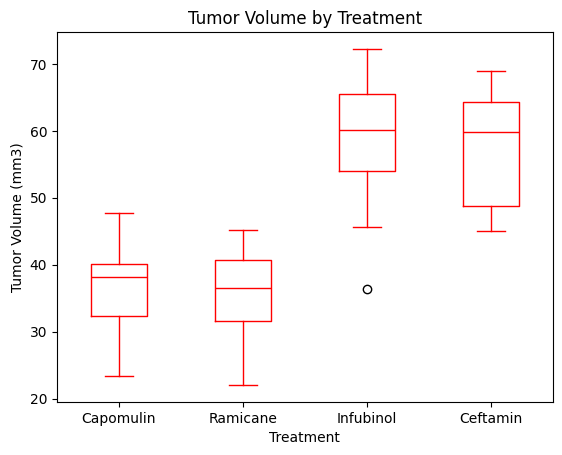

In [93]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot_df.boxplot(grid=False, color='red')
plt.title('Tumor Volume by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

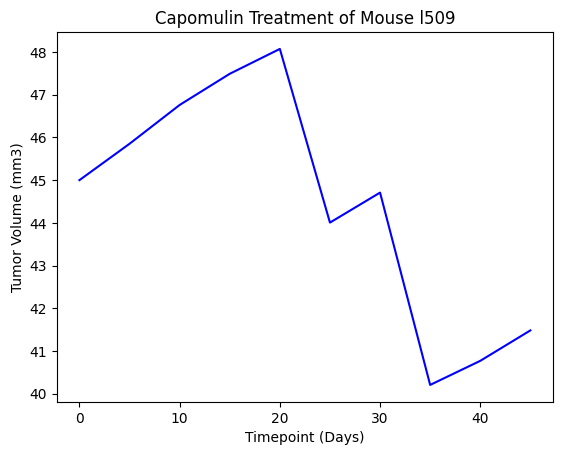

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mousel509_data = clean_df.loc[clean_df['Mouse ID'] == "l509"]
line_data = mousel509_data[['Timepoint','Tumor Volume (mm3)']]
x_axis = line_data["Timepoint"]
y_axis = line_data["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, color="blue",)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [130]:
# creates a dataframe of just information for the Capomulin trial. This will be used to find the average weight
capomulin_data_all = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]

# this creates a creates a dataframe of the Capomulin trial from the max timepoint earlier. This dataframe only contains one weight value for each mouse and will be used for plotting.
capomulin_data_single_weight = max_timepoints_extra.loc[max_timepoints_extra['Drug Regimen'] == "Capomulin"]


#finds the average volume of tumor for each mouse across the trial
average_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#merges the average volume with the dataframe with only one weight value for each mouse
tumor_volume_df = pd.merge(capomulin_data_single_weight, average_volume, on='Mouse ID', how='right')

#finds the values we need to plot for the x and y axes
x_scatter = tumor_volume_df['Weight (g)']
y_scatter = tumor_volume_df['Tumor Volume (mm3)_y']



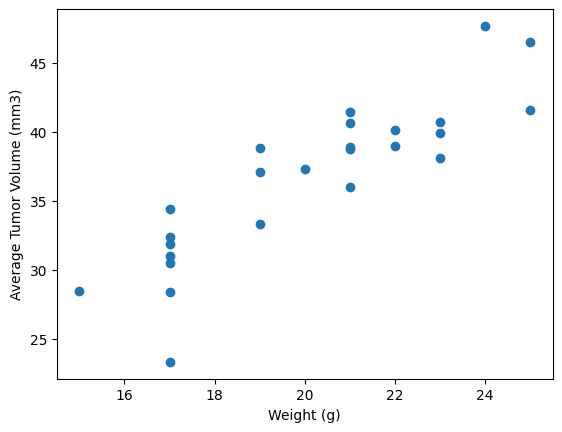

In [129]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(x_scatter, y_scatter)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume for mice treated with Capomulin is 0.8767060403658119.


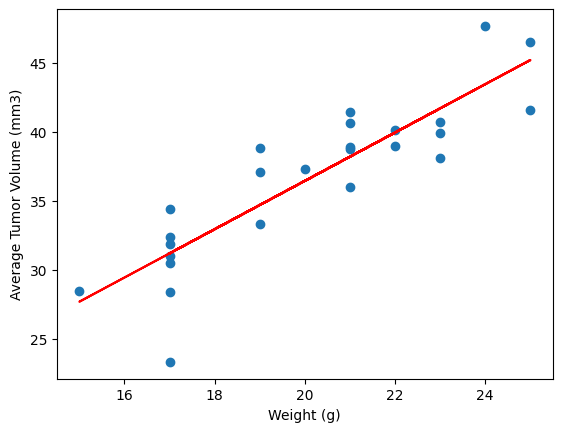

In [128]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_scatter, y_scatter)
regress_values = x_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
plt.plot(x_scatter,regress_values,"r-")
print(f"The correlation between mouse weight and the average tumor volume for mice treated with Capomulin is {rvalue}.")
plt.scatter(x_scatter, y_scatter)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()